In [1]:
!nvidia-smi

Sat Sep 19 17:07:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    On   | 00000000:03:00.0  On |                  N/A |
| 38%   54C    P2    47W / 180W |   1840MiB /  8116MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Enabled CUDA devices: 1


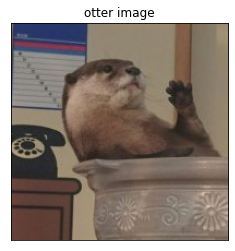

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
print('Enabled CUDA devices:',cv.cuda.getCudaEnabledDeviceCount())

src = cv.cvtColor(cv.imread("maharo.jpg"),cv.COLOR_BGR2RGB)
w, h, c = src.shape
plt.subplot(111),plt.imshow(src,cmap = 'gray')
plt.title('otter image'), plt.xticks([]), plt.yticks([])
plt.show()

g_src = cv.cuda_GpuMat()
g_dst = cv.cuda_GpuMat()
g_src.upload(src)

In [3]:
def get_rot_affine(src, rot, scale):
    h, w = src.shape[:2]
    rot_affine = cv.getRotationMatrix2D((h/2, w/2), rot, scale)
    rot_affine[:2,2] -= [h/2, w/2]
    rot_affine[:2,2] += [h/2*scale, w/2*scale]
    return rot_affine

In [4]:
rot_affine = get_rot_affine(src, 20, 1)

In [5]:
%%timeit
img_dst = cv.warpAffine(src, rot_affine, (w*1, h*1), flags=cv.INTER_CUBIC)

1.06 ms ± 2.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


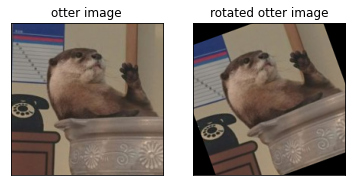

In [6]:
img_dst = cv.warpAffine(src, rot_affine, (w*1, h*1), flags=cv.INTER_CUBIC)
plt.subplot(121),plt.imshow(src,cmap = 'gray')
plt.title('otter image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_dst,cmap = 'gray')
plt.title('rotated otter image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
%%timeit
g_dst = cv.cuda.warpAffine(g_src, rot_affine, (w*1, h*1), flags=cv.INTER_CUBIC)

481 µs ± 316 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
g_src.upload(src)
g_dst = cv.cuda.warpAffine(g_src, rot_affine, (w*1, h*1), flags=cv.INTER_CUBIC)
gpu_dst = g_dst.download()

450 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


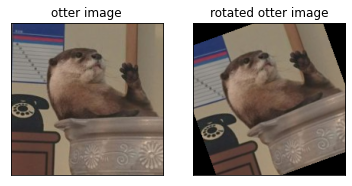

In [9]:
g_dst = cv.cuda.warpAffine(g_src, rot_affine, (w*1, h*1), flags=cv.INTER_CUBIC)
gpu_dst = g_dst.download()
plt.subplot(121),plt.imshow(src,cmap = 'gray')
plt.title('otter image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gpu_dst,cmap = 'gray')
plt.title('rotated otter image'), plt.xticks([]), plt.yticks([])
plt.show()

## 10倍, 20度回転

In [10]:
rot_affine = get_rot_affine(src, 20, 10)

In [11]:
%%timeit
img_dst = cv.warpAffine(src, rot_affine, (w*10, h*10), flags=cv.INTER_CUBIC)

7.29 ms ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


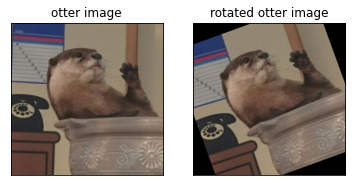

In [12]:
img_dst = cv.warpAffine(src, rot_affine, (w*10, h*10), flags=cv.INTER_CUBIC)
plt.subplot(121),plt.imshow(src,cmap = 'gray')
plt.title('otter image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_dst,cmap = 'gray')
plt.title('rotated otter image'), plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
%%timeit
g_dst = cv.cuda.warpAffine(g_src, rot_affine, (w*10, h*10), flags=cv.INTER_CUBIC)

1.42 ms ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
g_src.upload(src)
g_dst = cv.cuda.warpAffine(g_src, rot_affine, (w*10, h*10), flags=cv.INTER_CUBIC)
gpu_dst = g_dst.download()

2.64 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


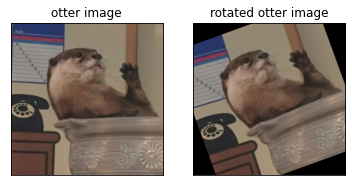

In [15]:
g_dst = cv.cuda.warpAffine(g_src, rot_affine, (w*10, h*10), flags=cv.INTER_CUBIC)
gpu_dst = g_dst.download()
plt.subplot(121),plt.imshow(src,cmap = 'gray')
plt.title('otter image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gpu_dst,cmap = 'gray')
plt.title('rotated otter image'), plt.xticks([]), plt.yticks([])
plt.show()